In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
%config InlineBackend.figure_formats = ['svg'] # Makes the plots svg (visually better)
from svm import SVM
from test_data import TestLinear
import numpy as np
import matplotlib.pyplot as plt
import random

Using random seed: 764
f_best=0.0
f_before_step=np.float64(0.0) f_after_step=np.float64(311871.50432621833) f_ref=inf
Line search triggered
Ran line search
Iteration 1: τ = 2.3895e-03, Δα = 1.2339e-01
f_before_step=np.float64(-3.186017163740738) f_after_step=np.float64(-4.042167652749569) f_ref=inf
Iteration 2: τ = 1.0000e-05, Δα = 4.7585e-02
f_before_step=np.float64(-4.042167652749569) f_after_step=np.float64(-4.045382842104275) f_ref=inf
Iteration 3: τ = 2.8997e-05, Δα = 1.7931e-04
f_before_step=np.float64(-4.045382842104275) f_after_step=np.float64(-4.054702970363412) f_ref=inf
Iteration 4: τ = 3.7876e-03, Δα = 5.1990e-04
f_before_step=np.float64(-4.054702970363412) f_after_step=np.float64(-5.115977584992958) f_ref=inf
Iteration 5: τ = 4.2811e-02, Δα = 6.4077e-02
f_before_step=np.float64(-5.115977584992958) f_after_step=np.float64(-4.595575521795919) f_ref=inf
Iteration 6: τ = 6.1212e-03, Δα = 5.8045e-01
f_before_step=np.float64(-4.595575521795919) f_after_step=np.float64(-9.4503305

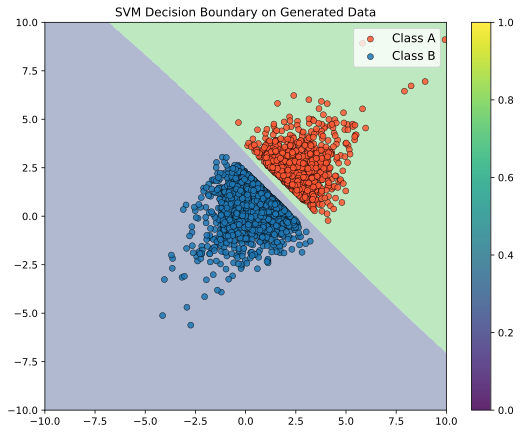

In [29]:
# Generate dataset
w = np.array([1.0, 1.0])
b = 1.0
n_A = 1000
n_B = 2000
margin = 0.5

random_seed = random.randint(0, 1000)
print(f"Using random seed: {random_seed}")
#random_seed = 146

listA, listB = TestLinear(w, b, n_A, n_B, margin, seed=random_seed)

# Convert lists to numpy arrays
X_A = np.array(listA) + 2
X_B = np.array(listB) + 2
X = np.vstack((X_A, X_B))
y = np.hstack((np.ones(n_A), -np.ones(n_B)))  # Class A = +1, Class B = -1

# Train the SVM
svm = SVM(C=1.0, kernel="gaussian", lr=0.01, mode="dual", sigma=2.5, s=3.5, max_iter=500, tol=1e-4)
%time svm.fit(X, y)

# Predict decision boundary
xx, yy = np.meshgrid(np.linspace(-10, 10, 50), np.linspace(-10, 10, 50))
Z = np.c_[xx.ravel(), yy.ravel()]
preds = svm.predict(Z).reshape(xx.shape)
decision_values = svm._decision_function(Z).reshape(xx.shape)

import pandas as pd
print(pd.Series(decision_values.flatten()).describe())

# Plot the results
plt.figure(figsize=(9, 7))
plt.contourf(xx, yy, decision_values, alpha=0.4, levels=[-100, 0, 100]) # , colors=["#AFCBFF", "#F19C8A"])
# plt.contour(xx, yy, decision_values, levels=[0], linewidths=2, colors="white")
plt.scatter(X_A[:, 0], X_A[:, 1], color="#FF5733", label="Class A", edgecolors="black", linewidth=0.5, alpha=0.85)
plt.scatter(X_B[:, 0], X_B[:, 1], color="#1F77B4", label="Class B", edgecolors="black", linewidth=0.5, alpha=0.85)
plt.legend(frameon=True, fontsize=12, loc="upper right")
plt.colorbar()
plt.title("SVM Decision Boundary on Generated Data")
plt.show()